### Group Members

- Xiaoxian(Eric) Wang
- Christine Liu

# Introduction

Extreme weather events can have a devastating impact on livelihoods. Increased news coverage of natural disasters such as wildfires, tornadoes, and heatwaves highlights their growing prevalence, especially in modern times. Much research has linked the increased frequency, intensity, and duration of such events to climate change (National Academies of Sciences, 2016). Therefore, understanding climate change trends is crucial to understanding the occurrence of extreme weather events. 

With the advent of big data and advanced visualization tools, we can now analyze vast amounts of weather data to uncover hidden patterns, correlations, and anomalies that were previously difficult to detect. This project aims to use data visualization and machine learning techniques to analyze and predict Vancouver's weather over time. We will focus on variables that have a direct and noticeable impact on weather events, such as temperature, wind speed, and precipitation. Historical weather analysis will be used to identify seasonal trends, understand relationships between variables, detect anomalies, and most importantly to illustrate the increasing intensity and frequency of extreme weather events. Below is a broad overview of our project:


### Part 1: Introduction of the Dataset and Data Cleaning

- We will use the  `vancouver_weather`  dataset for our analysis. The dataset contains weather records from 1997  to  2024 .
- We will also clean the data to define the scope of our study and retain the variables most relevant to it.
    
### Part 2: Analysis on Extreme Weather Events
    
- This will be the main section of our project, where we aim to explore the intensified patterns of extreme weather events over the years. 
- We will identify seasonal trends using line charts, examine relationships between variables with a heatmap, detect anomalies with pairwise correlation scatterplots, and illustrate the increasing intensity of extreme weather events through scatter plots and a histogram.

### Part 3: Building a Prediction Model

- Building on the understanding of the increasingly intensified extreme weather patterns in historical records from Part 2, we will develop a linear regression model to predict future trends in maximum temperature.

### Part 4: Discussion & Conclusion
- By obtaining meaningful results from historical trends, we will discuss the implications and importance of strengthening the implementation of climate change policies for more effective and tangible outcomes.


# Part 1: Introduction of the Dataset and Data Cleaning

The `vancouver_weather` dataset is extracted from `Environment and Climate Change Canada` and contains weather records for Vancouver from 1997 to 2024. The variables include daily measurements of maximum and minimum temperature, wind speed, dew point, humidex, precipitation, rainfall, snowfall, humidity, and radiation. Since the focus of our study is to identify trends in extreme weather events, we transformed the dataframe and retained only the variables most directly related to these events: temperature, precipitation, and wind speed.

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the dataset
weather_data = pd.read_csv("vancouver_weather.csv")

# Preview the dataset
weather_data

,date,max_dew_point_v,max_dew_point_c,max_dew_point_d,max_dew_point_y,max_humidex_v,max_humidex_c,max_humidex_d,max_humidex_y,max_min_temperature_v,...,min_temperature_d,min_temperature_y,min_wind_speed_v,min_wind_speed_c,min_wind_speed_d,min_wind_speed_y,min_windchill_v,min_windchill_c,min_windchill_d,min_windchill_y
0,2024-09-10,17.3,71,1953-09-10 2023-09-10,1995 2007 2020,29.0,17.0,1953-09-10 2023-09-10,2020,15.6,...,1937-09-10 2023-09-10,1964,0,71,1953-09-10 2023-09-10,1958 1959 1960 1963 1964 1965 1966 1967 1969 1...,NaN,NaN,NaN,NaN
1,2024-09-09,18.9,72,1953-09-09 2024-09-09,1963,31.0,13.0,1953-09-09 2021-09-09,1963,16.7,...,1937-09-09 2024-09-09,1945,0,72,1953-09-09 2024-09-09,1955 1957 1959 1960 1961 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
2,2024-09-08,19.0,72,1953-09-08 2024-09-08,1993,30.0,12.0,1963-09-08 2024-09-08,1981,16.6,...,1937-09-08 2024-09-08,1959,0,72,1953-09-08 2024-09-08,1954 1956 1959 1960 1961 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
3,2024-09-07,18.3,72,1953-09-07 2024-09-07,1963 2024,30.0,18.0,1958-09-07 2024-09-07,1993,16.3,...,1937-09-07 2024-09-07,1970,0,72,1953-09-07 2024-09-07,1957 1958 1960 1962 1963 1965 1966 1967 1968 1...,NaN,NaN,NaN,NaN
4,2024-09-06,18.6,72,1953-09-06 2024-09-06,2024,31.0,20.0,1953-09-06 2024-09-06,2017,17.7,...,1937-09-06 2024-09-06,1965,0,72,1953-09-06 2024-09-06,1954 1958 1959 1960 1961 1962 1965 1966 1967 1...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1997-04-30,13.9,45,1953-04-30 1997-04-30,1957,NaN,NaN,NaN,NaN,11.1,...,1937-04-30 1997-04-30,1954,0,45,1953-04-30 1997-04-30,1953 1956 1958 1965 1967 1969 1970 1971 1973 1...,NaN,NaN,NaN,NaN
9996,1997-04-29,13.8,45,1953-04-29 1997-04-29,1992,NaN,NaN,NaN,NaN,10.8,...,1937-04-29 1997-04-29,1975,0,45,1953-04-29 1997-04-29,1954 1955 1956 1958 1963 1967 1968 1970 1972 1...,NaN,NaN,NaN,NaN
9997,1997-04-28,13.6,45,1953-04-28 1997-04-28,1992,NaN,NaN,NaN,NaN,10.6,...,1937-04-28 1997-04-28,1986,0,45,1953-04-28 1997-04-28,1953 1956 1957 1958 1960 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
9998,1997-04-27,13.7,45,1953-04-27 1997-04-27,1992,NaN,NaN,NaN,NaN,11.1,...,1937-04-27 1997-04-27,1948,0,45,1953-04-27 1997-04-27,1958 1960 1961 1965 1966 1967 1968 1969 1970 1...,NaN,NaN,NaN,NaN


In [3]:
# Data Cleaning for Time-Series observation

# Selecting relevant columns for time-series analysis.
ts_columns = ["date","max_temperature_v", "max_wind_speed_v","min_temperature_v","max_precipitation_v"]
ts = weather_data[ts_columns]
ts["date"] = pd.to_datetime(ts["date"])

# Renaming columns to remove suffixes and make them more readable.
ts = ts.rename(columns={
    "max_temperature_v": "max_temperature",
    "max_wind_speed_v": "max_wind_speed",
    "min_temperature_v": "min_temperature",
    "max_precipitation_v":"max_precipitation"
})

# Replace any missing values with the average of that column
cm_data=ts.dropna()
ts_data=ts
ts_data.fillna(ts_data.mean(), inplace=True)

# Preview of the dataframe after cleaning
ts_data

C:\Users\wangx\AppData\Local\Temp\ipykernel_15112\1827571963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["date"] = pd.to_datetime(ts["date"])


,date,max_temperature,max_wind_speed,min_temperature,max_precipitation
0,2024-09-10,26.1,48,5.6,26.4
1,2024-09-09,26.0,65,6.1,15.8
2,2024-09-08,26.2,63,6.1,16.8
3,2024-09-07,25.6,48,6.1,14.2
4,2024-09-06,27.6,43,6.1,24.2
...,...,...,...,...,...
9995,1997-04-30,23.9,39,-0.6,36.1
9996,1997-04-29,23.9,42,1.1,39.6
9997,1997-04-28,21.7,42,0.8,22.6
9998,1997-04-27,25.0,53,-0.6,33.0


# Part 2: Analysis on Extreme Weather Events

### Timeseries Analysis

What are the patterns of extreme weather events over time? We aim to explore the overall trends for each variable across decades. To achieve this, we created a time series line chart to visualize the trends of each weather variable during the same months across the years. Consistent with the conclusions of prevalent studies on increasing extreme climate patterns (Coumou & Rahmstorf, 2012), we observed a rise in record-breaking values for both minimum and maximum measurements of all weather variables over the years, continuing up to the present day.

We observe that the trends of increased extremes are most pronounced during the summer and winter months. Particularly in these months, over the years, we have noted a clear trend of an average increase in maximum temperatures, wind speeds, and precipitation, as well as an average decrease in minimum temperatures. What’s particularly interesting in the visualization is the undeniable trend of record-breaking extreme values across all weather variables.



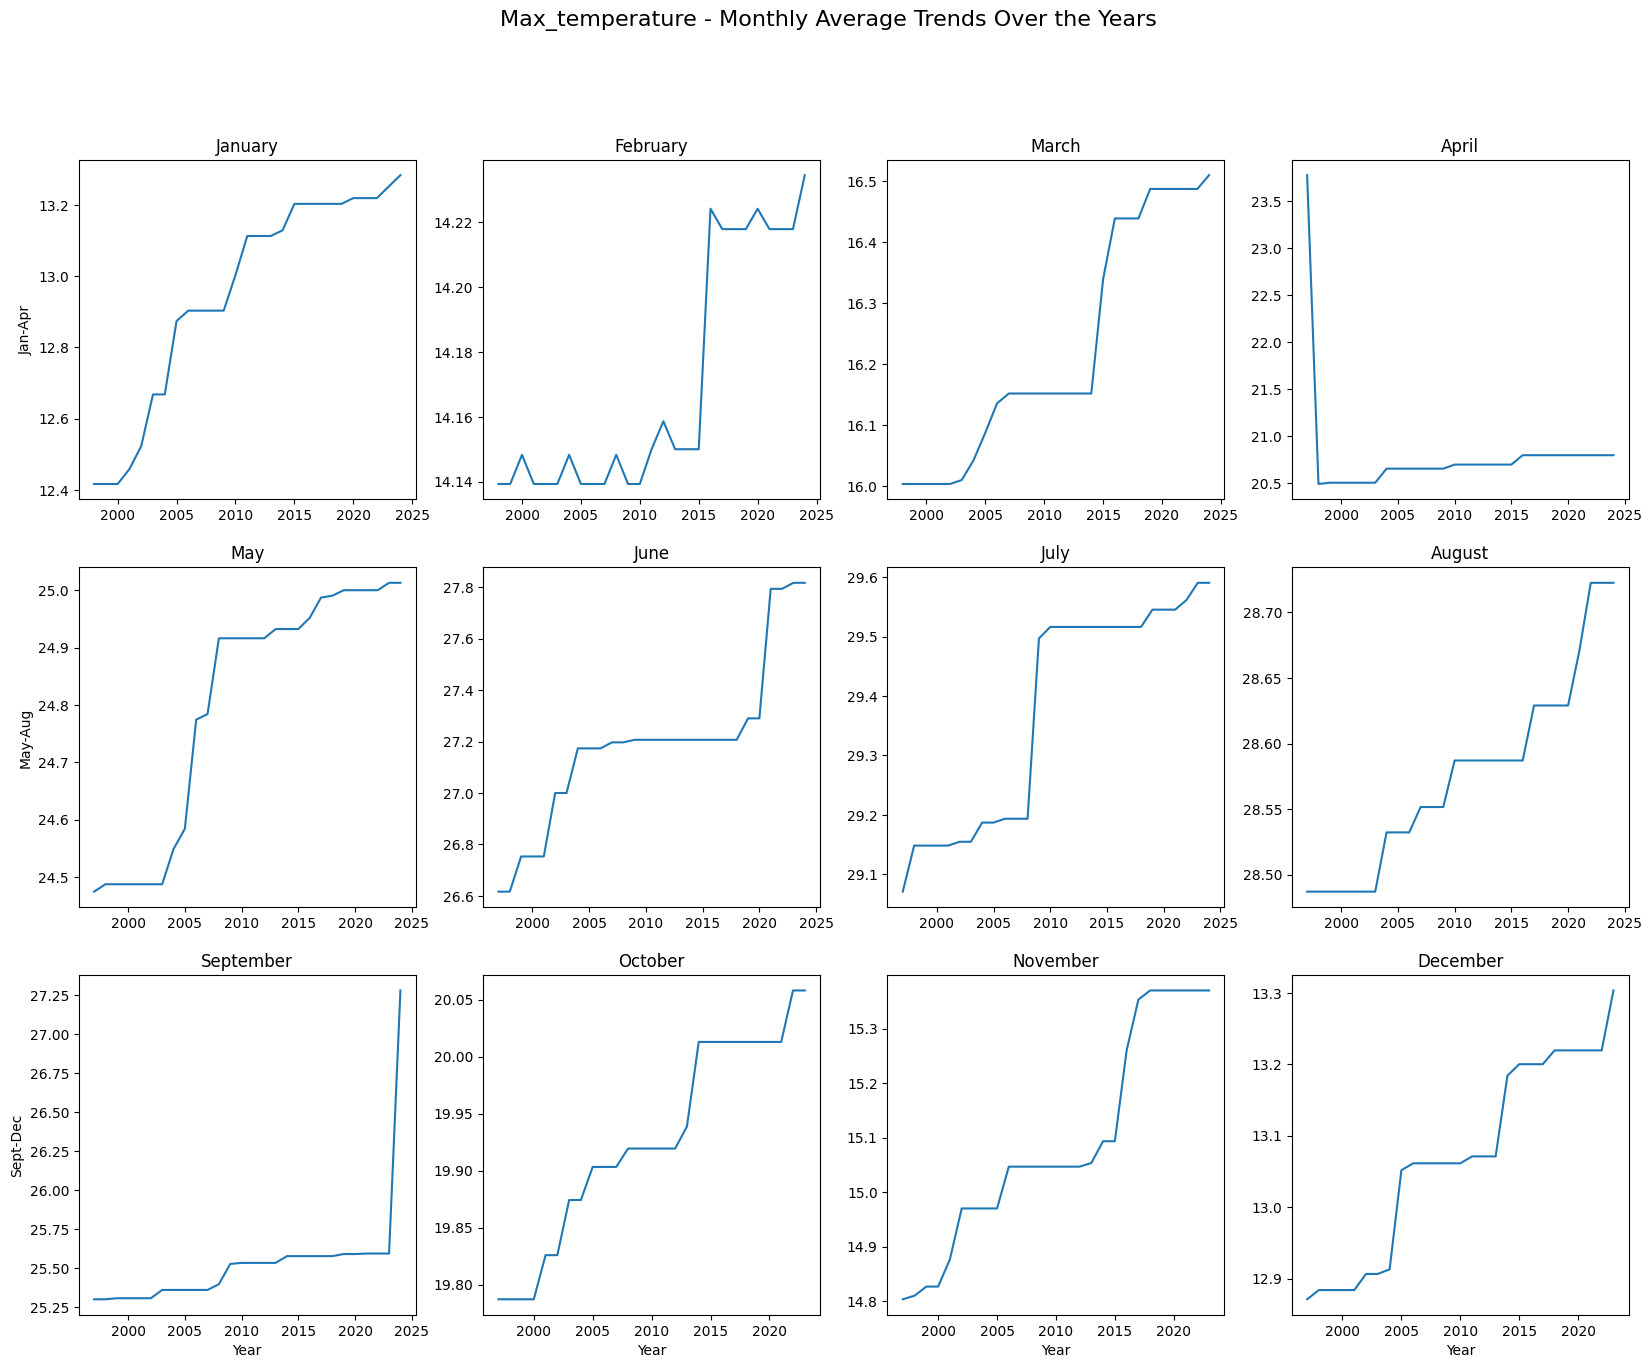

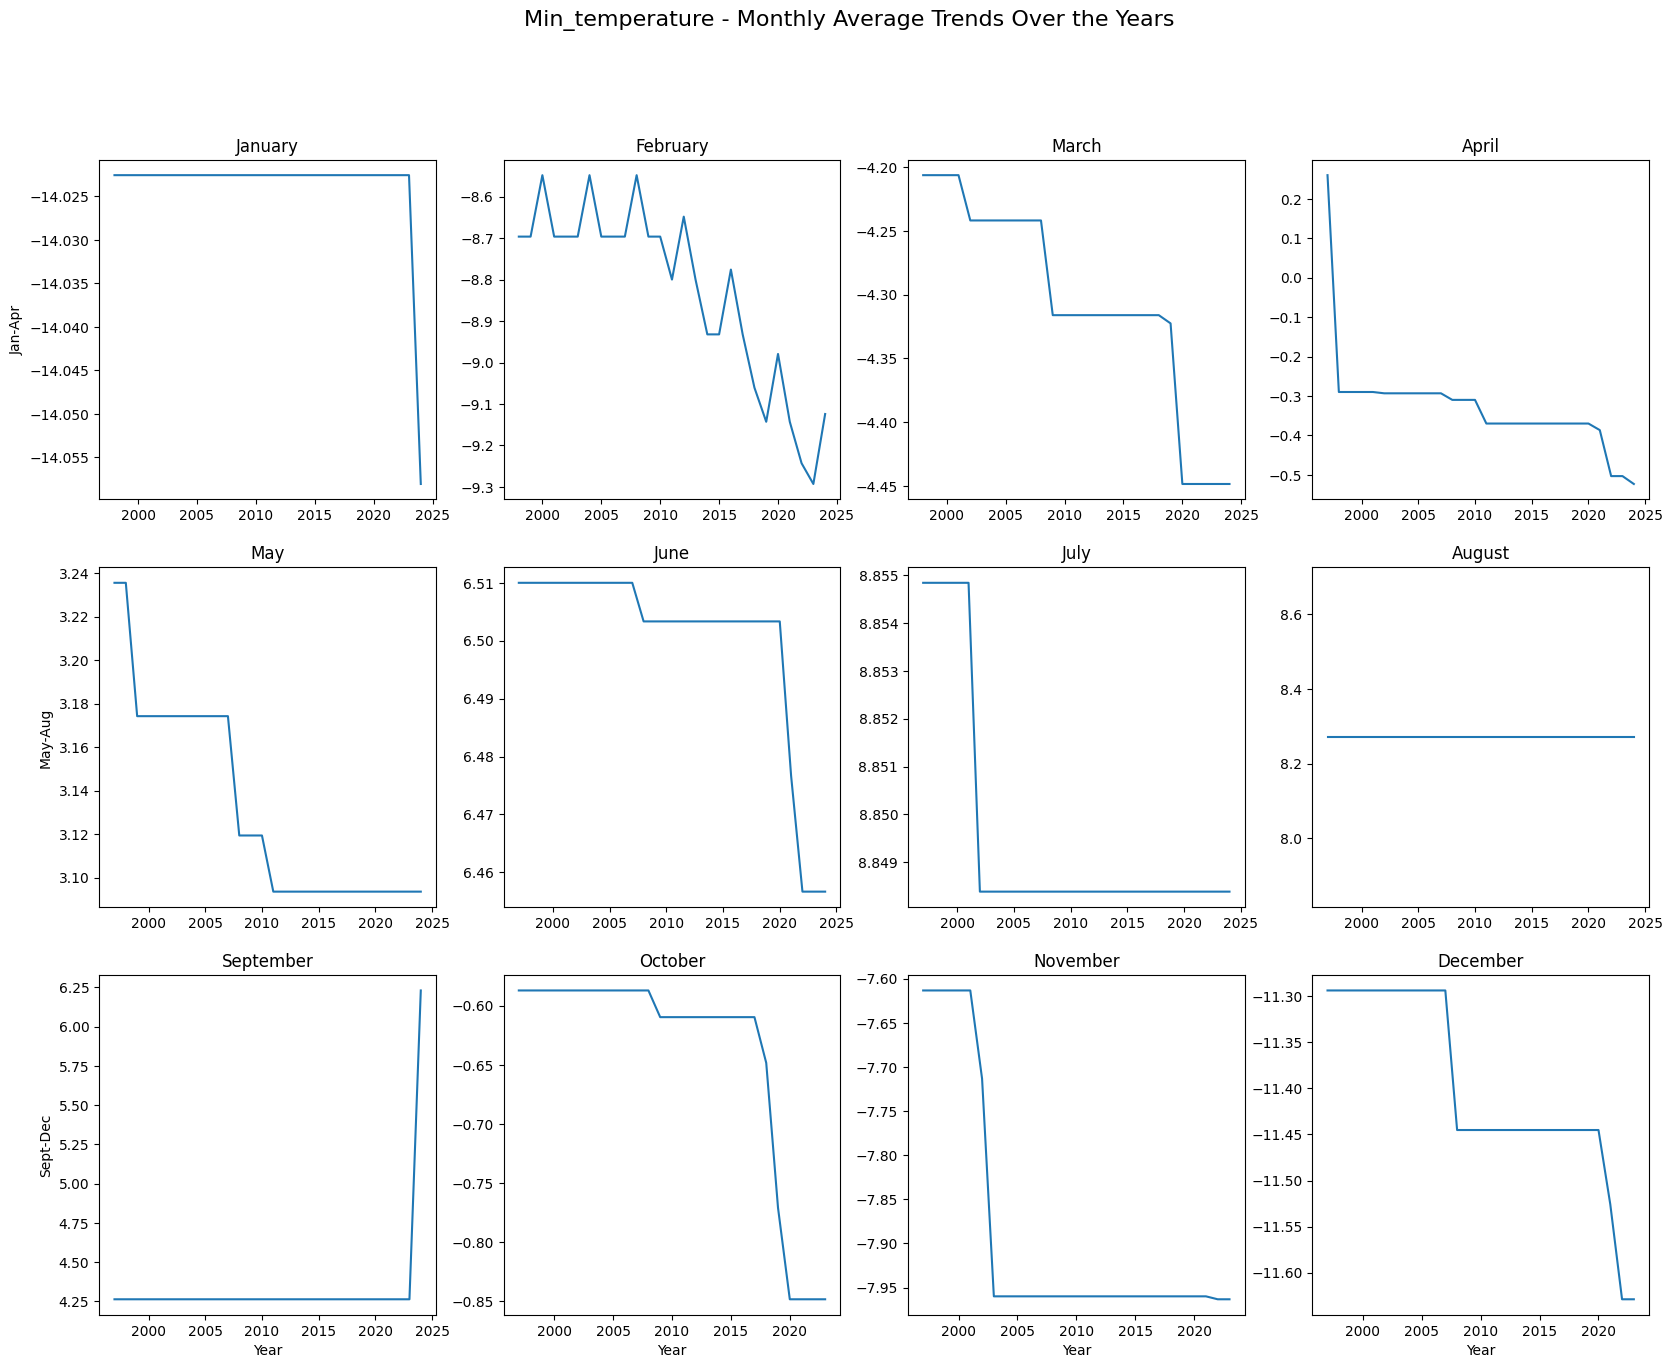

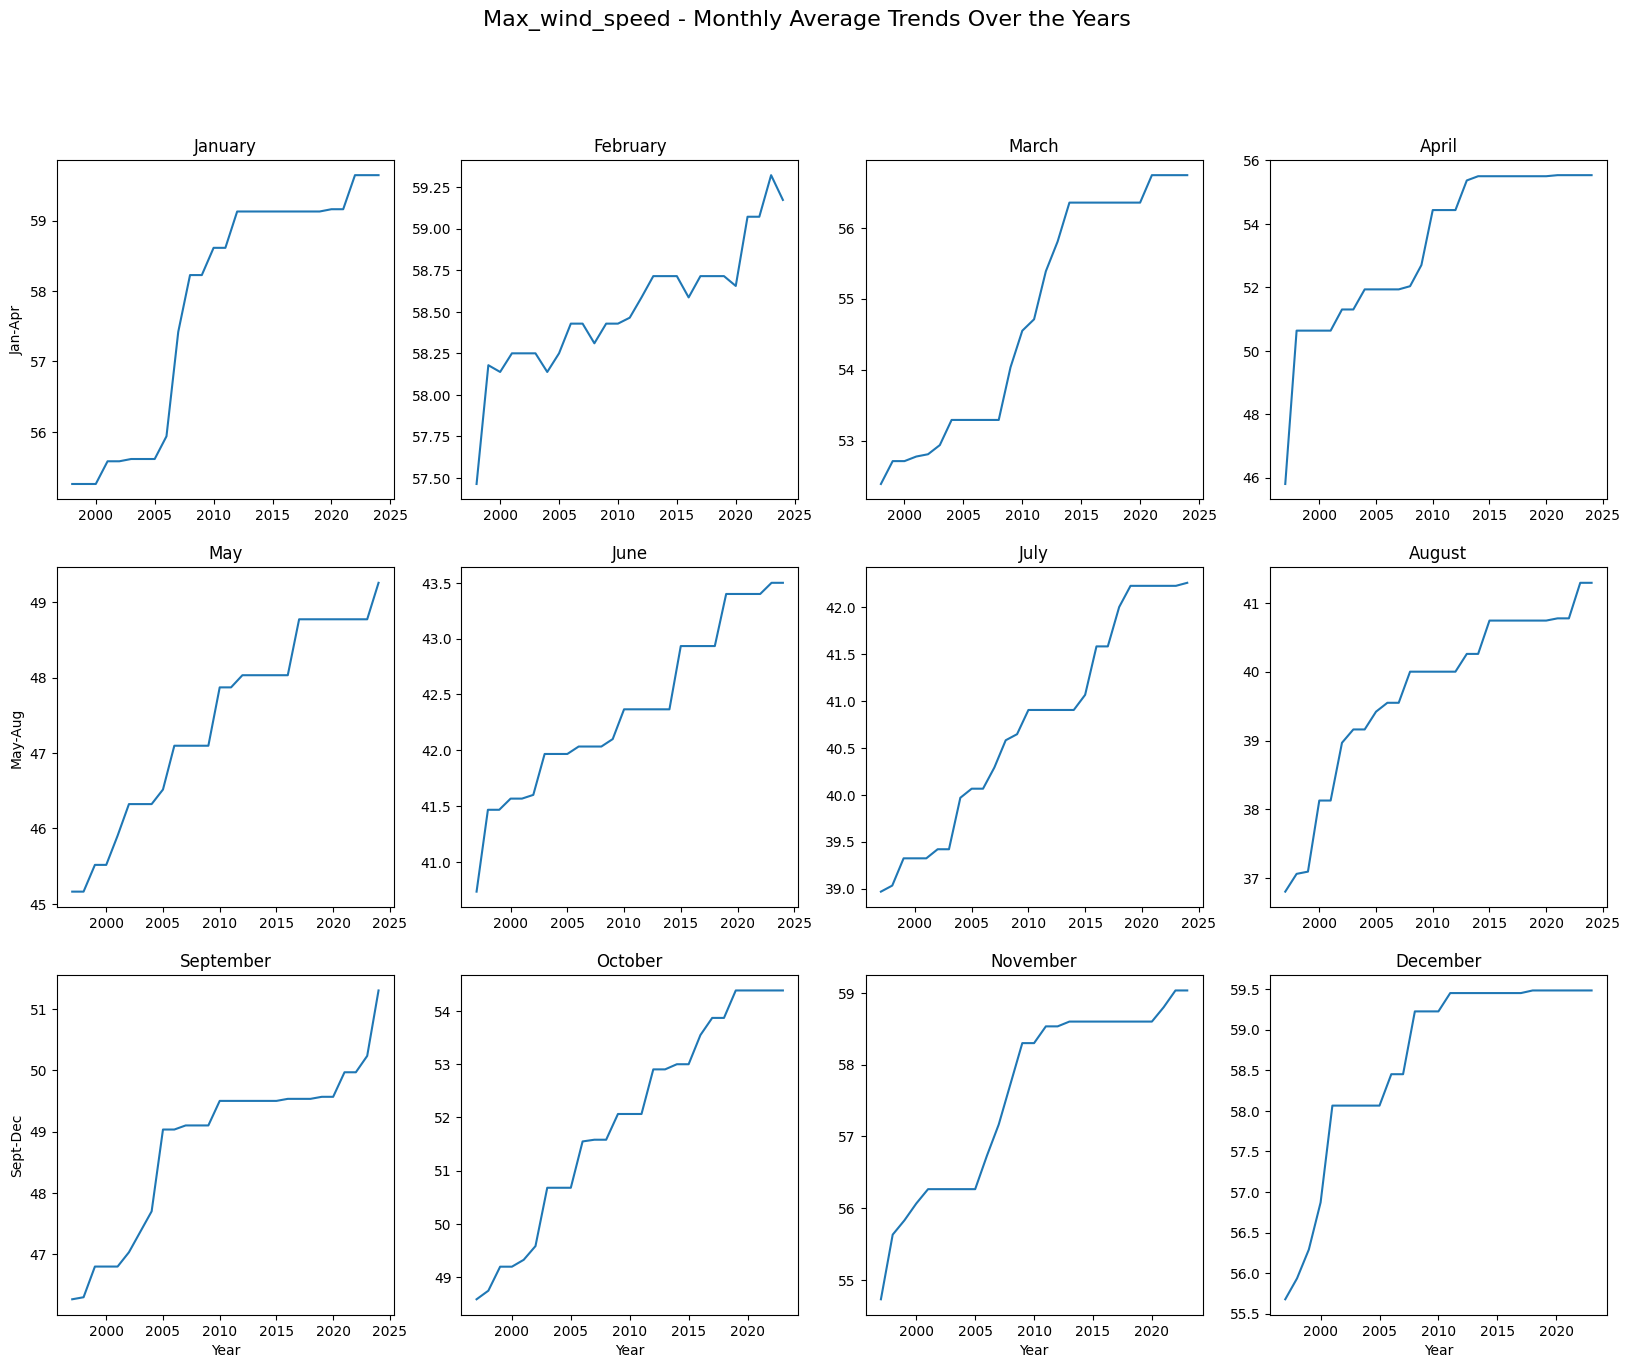

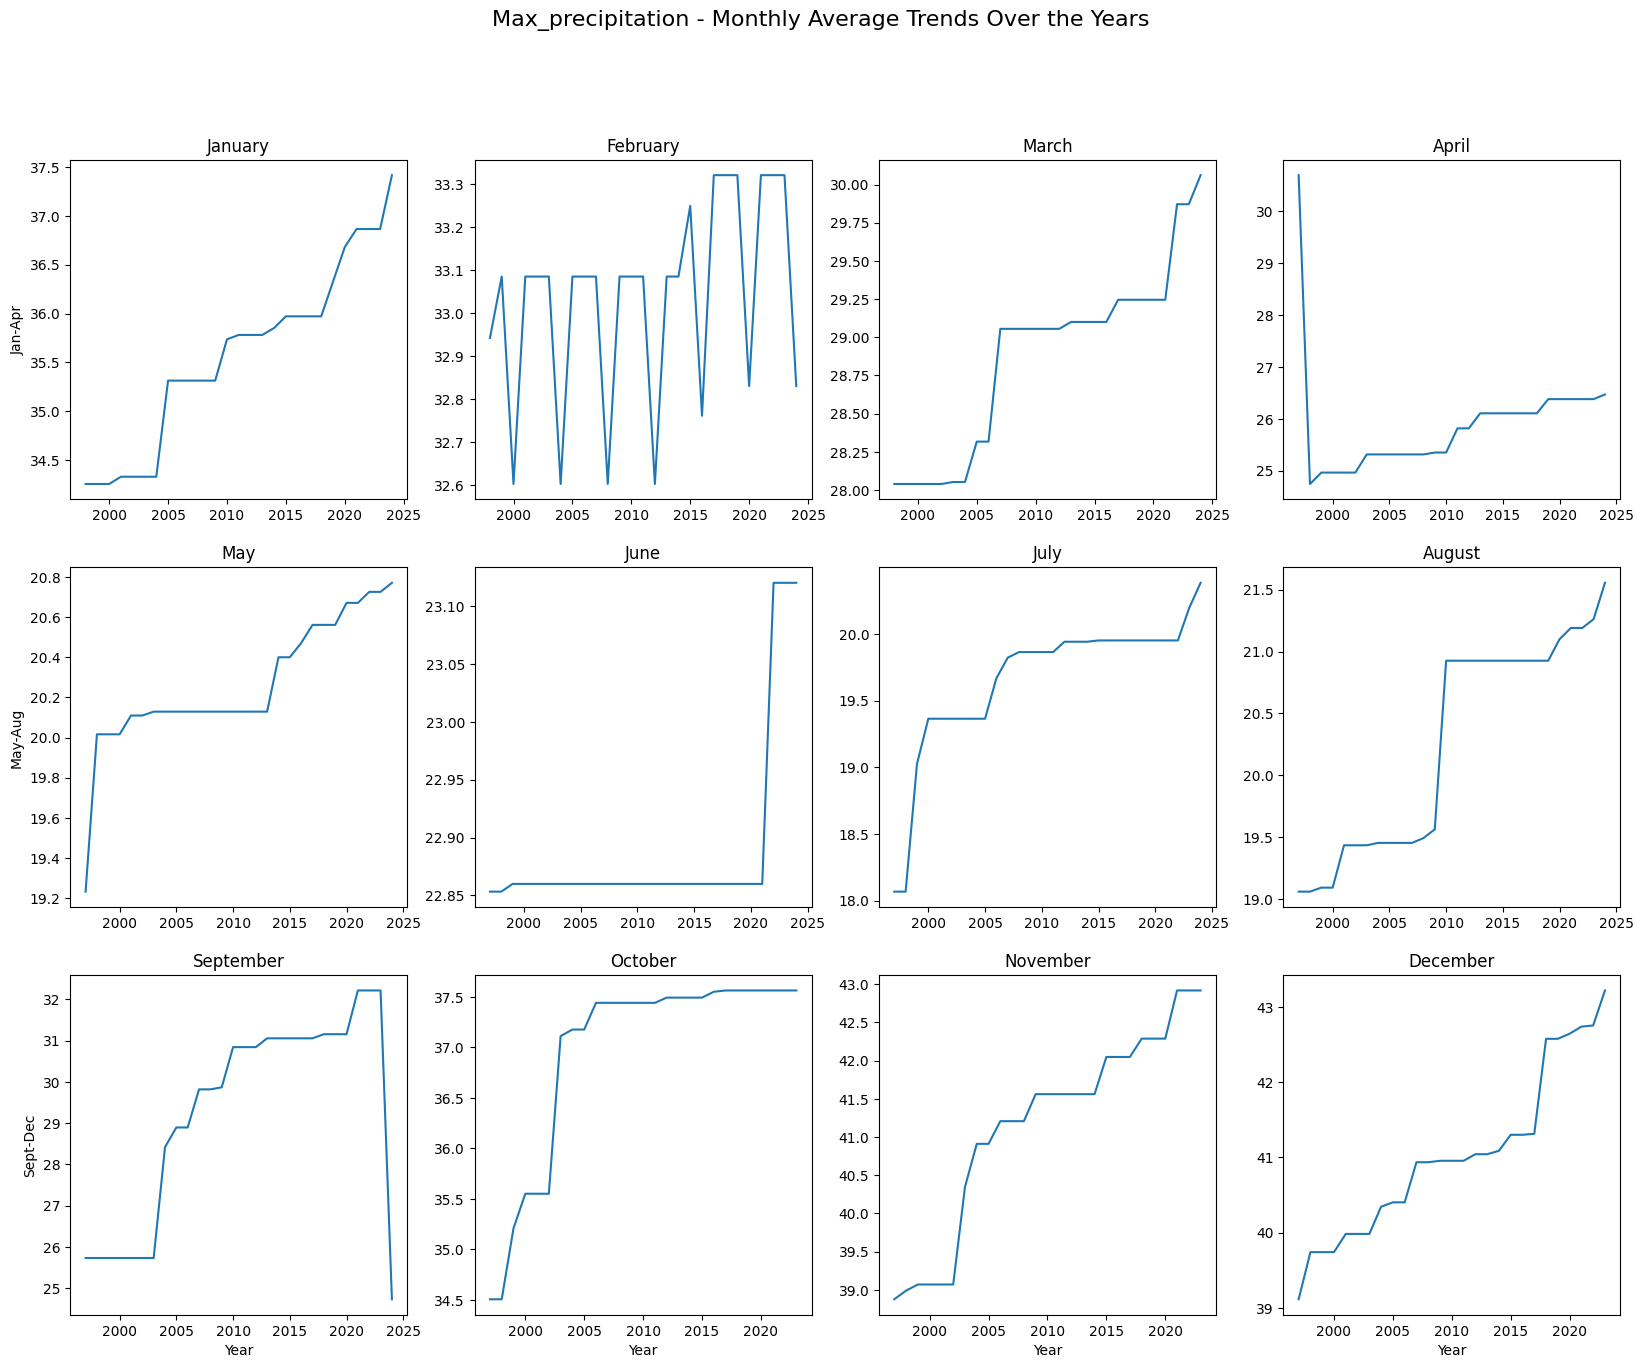

In [4]:
# Extract month and year for grouping
ts_data["month"] = ts_data["date"].dt.month
ts_data["year"] = ts_data["date"].dt.year

# List of variables to compute monthly averages for
variables = ["max_temperature", "min_temperature","max_wind_speed","max_precipitation"]
monthly_avg = ts_data.groupby(["year", "month"])[variables].mean().reset_index()

# Time-Series Visualization by Month
month_groups = [(1, 4), (5, 8), (9, 12)]
month_labels = ["Jan-Apr", "May-Aug", "Sept-Dec"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for variable in variables:
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f"{variable.capitalize()} - Monthly Average Trends Over the Years", fontsize=16)

    for month in range(1, 13):
        row, col = divmod(month - 1, 4)
        monthly_data = monthly_avg[monthly_avg["month"] == month]
        ax = axes[row, col]
        ax.plot(monthly_data["year"], monthly_data[variable], label=f"{months[month - 1]}")
        ax.set_title(f"{months[month - 1]}")
        
        if row == 2:
            ax.set_xlabel("Year")
        if col == 0:
            ax.set_ylabel(f"{month_labels[row]}")
plt.show()

### Correlation Matrix Analysis

Aside from the analysis of individual variables, we are also interested in exploring the correlations between them. To do so, we created a correlation matrix. 

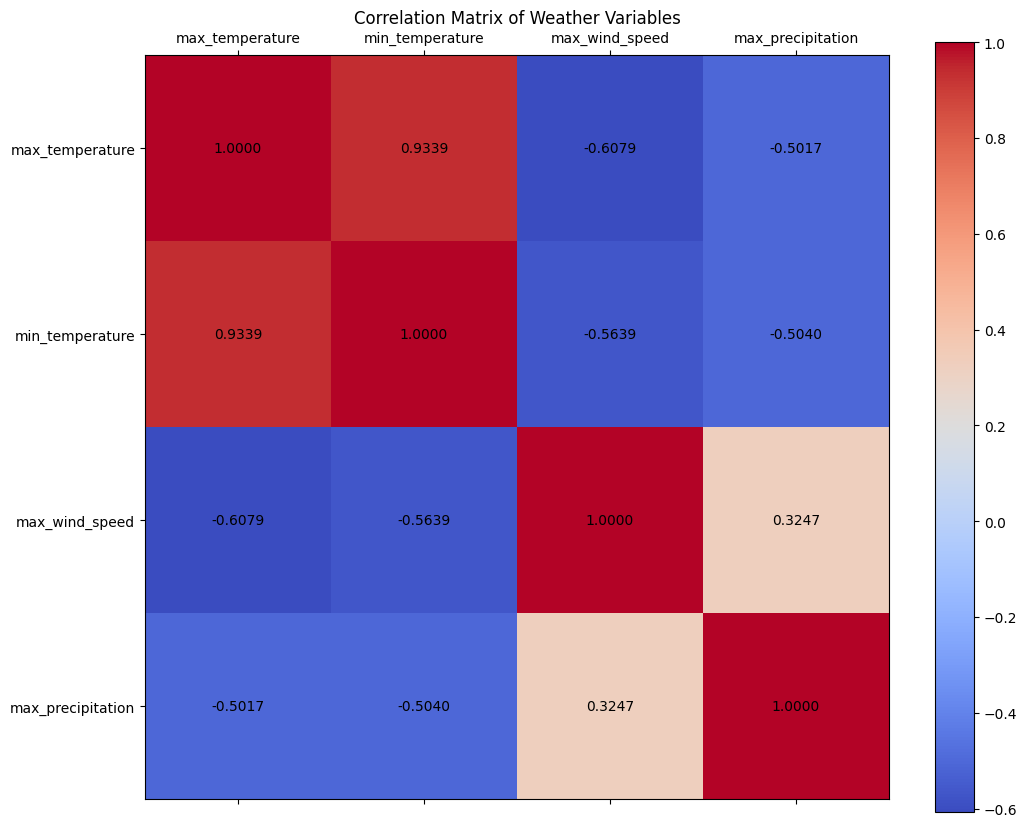

In [5]:
# Correlation Matrix

# Cleaning data with no NA values
cm = cm_data[variables].corr()

# Set figure size and color
fig, ax = plt.subplots(figsize=(12, 10))
plt.colorbar(ax.matshow(cm, cmap="coolwarm"))

# Set ticks to show variable names
ax.set_xticks(range(len(cm.columns)))
ax.set_yticks(range(len(cm.index)))
ax.set_xticklabels(cm.columns)
ax.set_yticklabels(cm.index)

# Add correlation coefficients
for i in range(len(cm.columns)):
    for j in range(len(cm.index)):
        ax.text(j, i, f"{cm.iloc[i, j]:.4f}", ha="center", va="center")

plt.title("Correlation Matrix of Weather Variables")
plt.show()

### Interpretation of the Correlation Matrix

Maximum Temperature and Minimum Temperature:
- There is a very strong positive correlation between maximum and minimum temperatures. This means that when maximum temperatures rise, minimum temperatures also tend to increase, and vice versa. Such a relationship is expected because both values tend to be influenced by broader climate trends and similar atmospheric conditions.

Maximum Temperature and Maximum Wind Speed:
- There is a moderate negative correlation between maximum temperature and maximum wind speed. This suggests that higher maximum temperatures are often associated with lower wind speeds. This relationship might indicate that in hotter conditions, especially during periods of heat waves, there tends to be reduced air movement.

Maximum Temperature and Maximum Precipitation:
- There is a moderate negative correlation between maximum temperature and maximum precipitation. This implies that higher maximum temperatures are generally associated with lower precipitation. This could suggest a tendency for hotter days to be less rainy, possibly related to conditions like heatwaves, which are often accompanied by reduced rainfall.

Minimum Temperature and Maximum Wind Speed:
- There is a moderate negative correlation between minimum temperature and maximum wind speed. This means that colder nights tend to be associated with increased wind speeds. This could indicate that windier conditions contribute to cooling during nighttime or that such weather patterns tend to bring cooler temperatures.

Minimum Temperature and Maximum Precipitation:
- There is a moderate negative correlation between minimum temperature and maximum precipitation. This suggests that periods with lower temperatures tend to have higher precipitation, which is consistent with seasonal or stormy weather patterns.

Maximum Wind Speed and Maximum Precipitation:
- There is a weak positive correlation between maximum wind speed and maximum precipitation. This indicates that, to some extent, windier conditions are associated with higher rainfall. This could reflect storm events, where both wind and rainfall are typically elevated.

These correlations highlight potential relationships between different weather variables, helping to understand how temperature, wind, and precipitation interact under different conditions. Such events have indeed been happening more frequently in Vancouver, threatening livelihoods, especially in recent years (CBC News, 2024). However, it's important to note that correlation does not imply causation, and these relationships may be influenced by underlying meteorological factors.


### Pairwise Scatter Plot

Building on the insights of increased extreme records of individual variables in recent days, we are interested in exploring whether this holds true when we combine the variables in pairs. To do so, we created a pairwise scatter plot and identified the outliers within each pair. The outliers indicate abnormal weather conditions. 

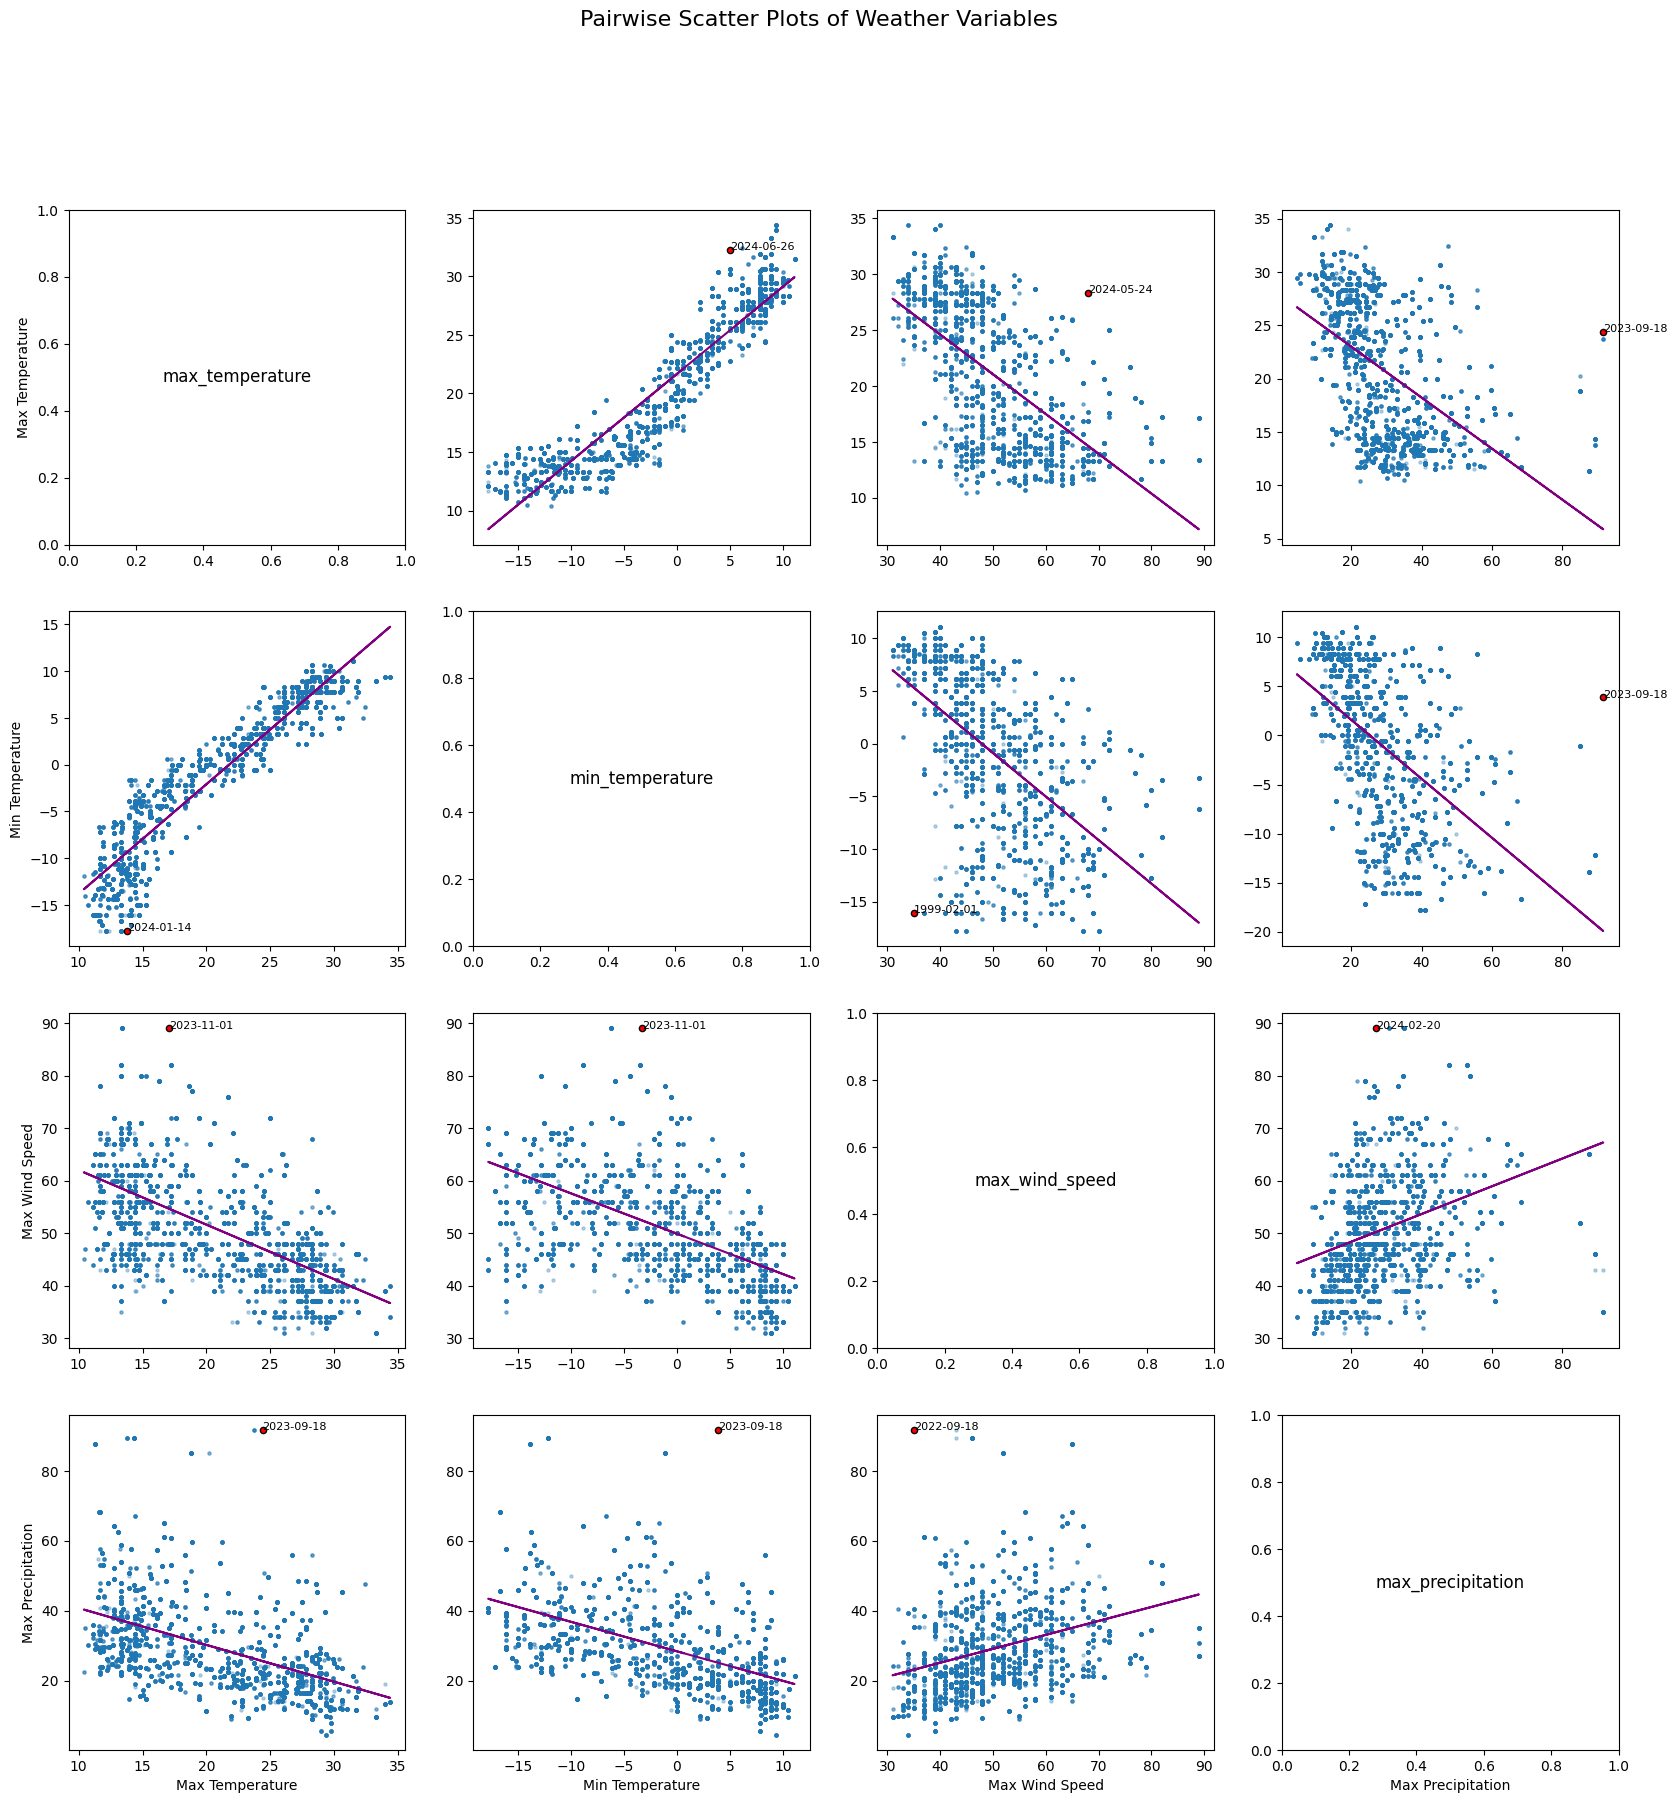

In [6]:
# Create pairwise scatter plots for all selected variables with regression lines and calculate errors
fig, axes = plt.subplots(len(variables), len(variables), figsize=(20, 20))
fig.suptitle("Pairwise Scatter Plots of Weather Variables", fontsize=16)

# DataFrame to store outliers detected in each pair of variables
all_outliers = pd.DataFrame()

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]
        if i != j:
            ax.scatter(cm_data[var2], cm_data[var1], alpha=0.3, s=5)

            # Add a regression line to indicate trend between variables
            if len(cm_data[var2]) > 1 and len(cm_data[var1]) > 1:
                
                # Calculate linear regression
                slope, intercept = np.polyfit(cm_data[var2], cm_data[var1], 1)
                regression_line = intercept + slope * cm_data[var2]
                ax.plot(cm_data[var2], regression_line, color="purple")

                # Calculate and indicate the largest errors
                errors = np.abs(cm_data[var1] - regression_line)
                largest_error_idx = errors.idxmax()
                largest_error_points = cm_data.loc[[largest_error_idx]]
                ax.scatter(largest_error_points[var2], largest_error_points[var1], color="red", edgecolor="black", s=20)

                # Indicate dates of largest errors
                for _, point in largest_error_points.iterrows():
                    ax.text(point[var2], point[var1], f"{point['date'].strftime('%Y-%m-%d')}", fontsize=8, color="black")
                all_outliers = pd.concat([all_outliers, largest_error_points])
        else:
            ax.text(0.5, 0.5, var1, fontsize=12, ha="center", va="center")
        if i == len(variables) - 1:
            ax.set_xlabel(var2.replace("_", " ").title())
        if j == 0:
            ax.set_ylabel(var1.replace("_", " ").title())

plt.show()


In [7]:
# Drop duplicate outliers and sort by date
sorted_outliers = all_outliers.drop_duplicates(subset="date").sort_values(by="date")
sorted_outliers

,date,max_temperature,max_wind_speed,min_temperature,max_precipitation
9353,1999-02-01,13.3,35,-16.1,38.6
723,2022-09-18,24.4,35,3.9,91.6
358,2023-09-18,24.4,43,3.9,91.6
314,2023-11-01,17.1,89,-3.3,35.0
240,2024-01-14,13.8,70,-17.8,39.6
203,2024-02-20,13.4,89,-6.2,27.0
109,2024-05-24,28.3,68,3.3,21.3
76,2024-06-26,32.3,41,5.0,24.0


Through the visualization, we found that almost all of the outliers occurred in the years 2022-2024, which aligns with the insight drawn from previous visualizations: extreme weather events are becoming increasingly more severe, especially in recent years.

### Visualizing the outliers for each month throughout the years

To understand if there is a trend of increasing anomaly severity over the years, we visualized the outliers of each variable in scatter plots. Each data point on the graph represents an outlier for a specific month of a given year. 

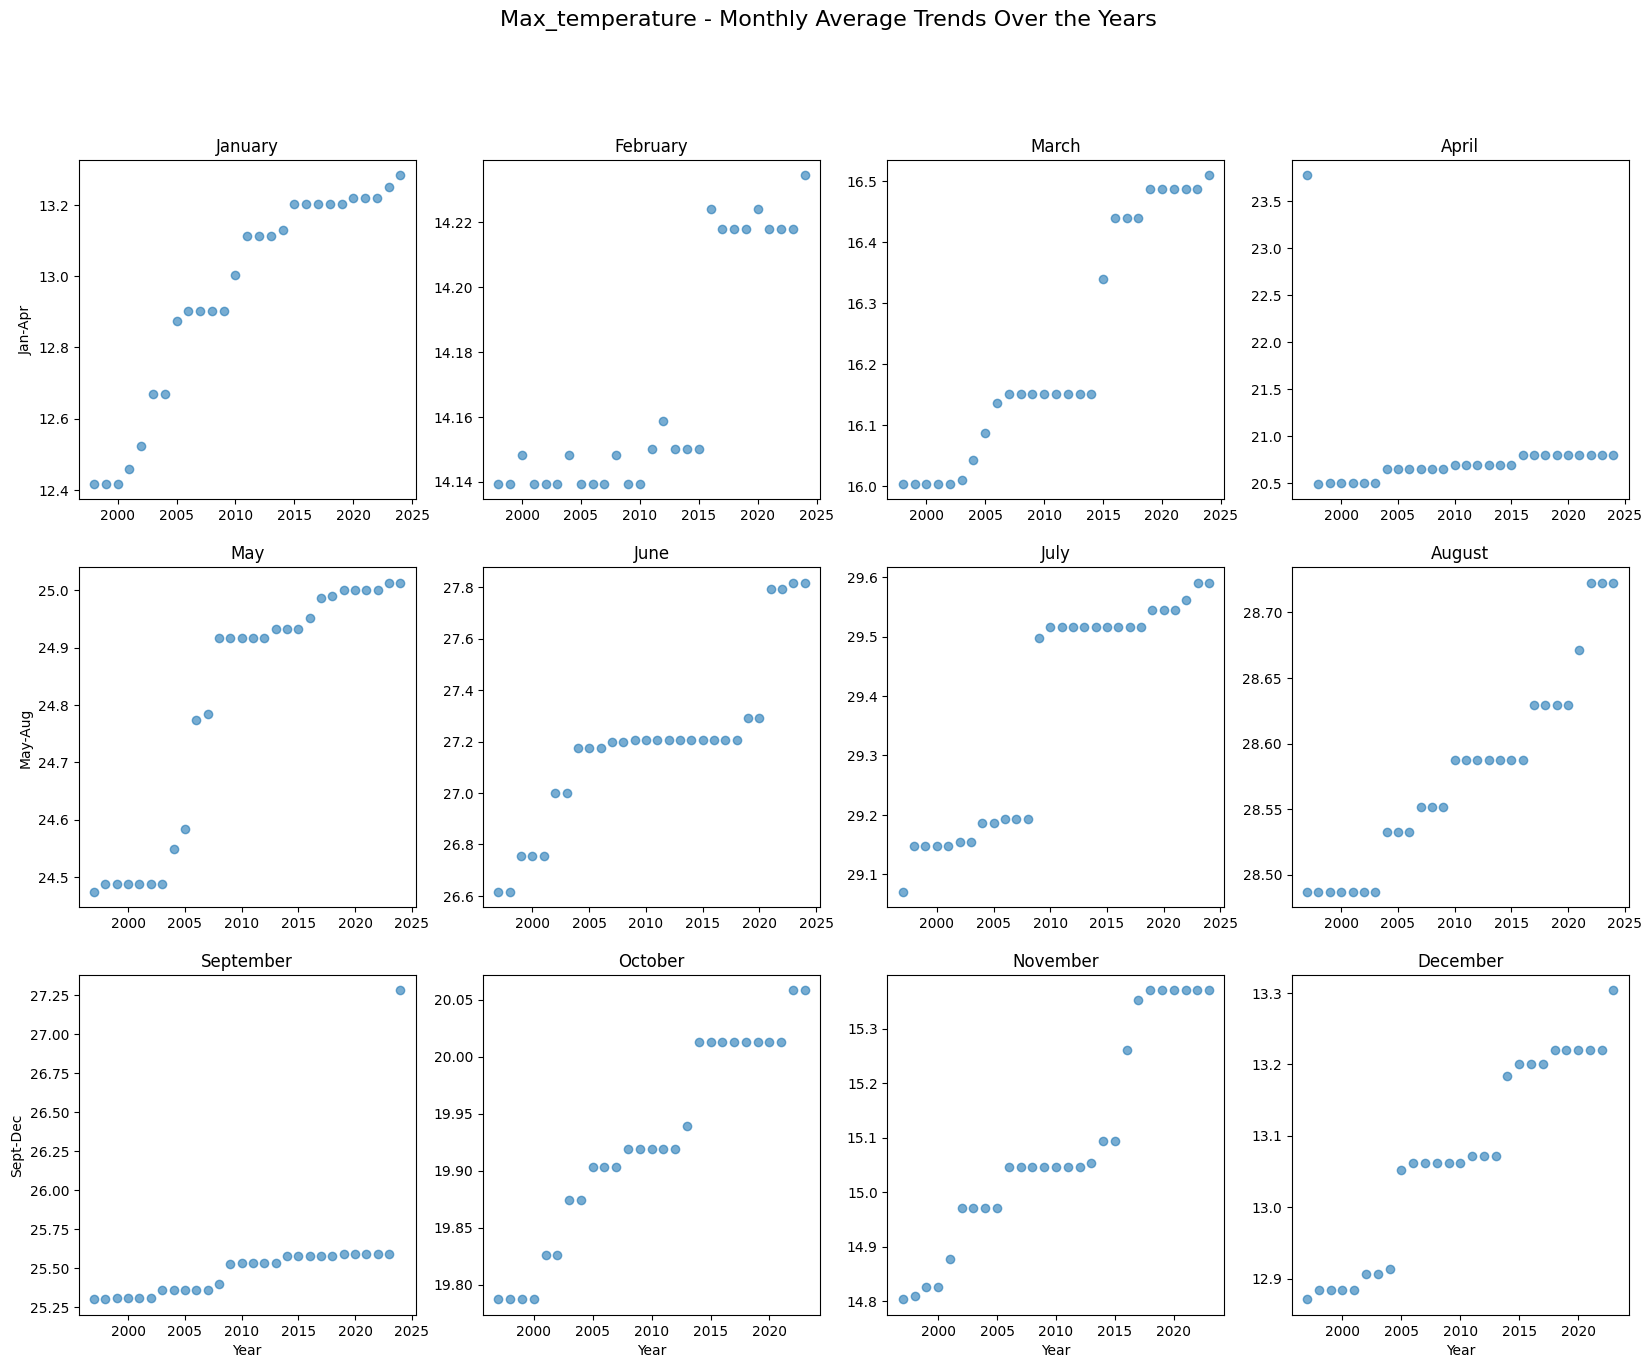

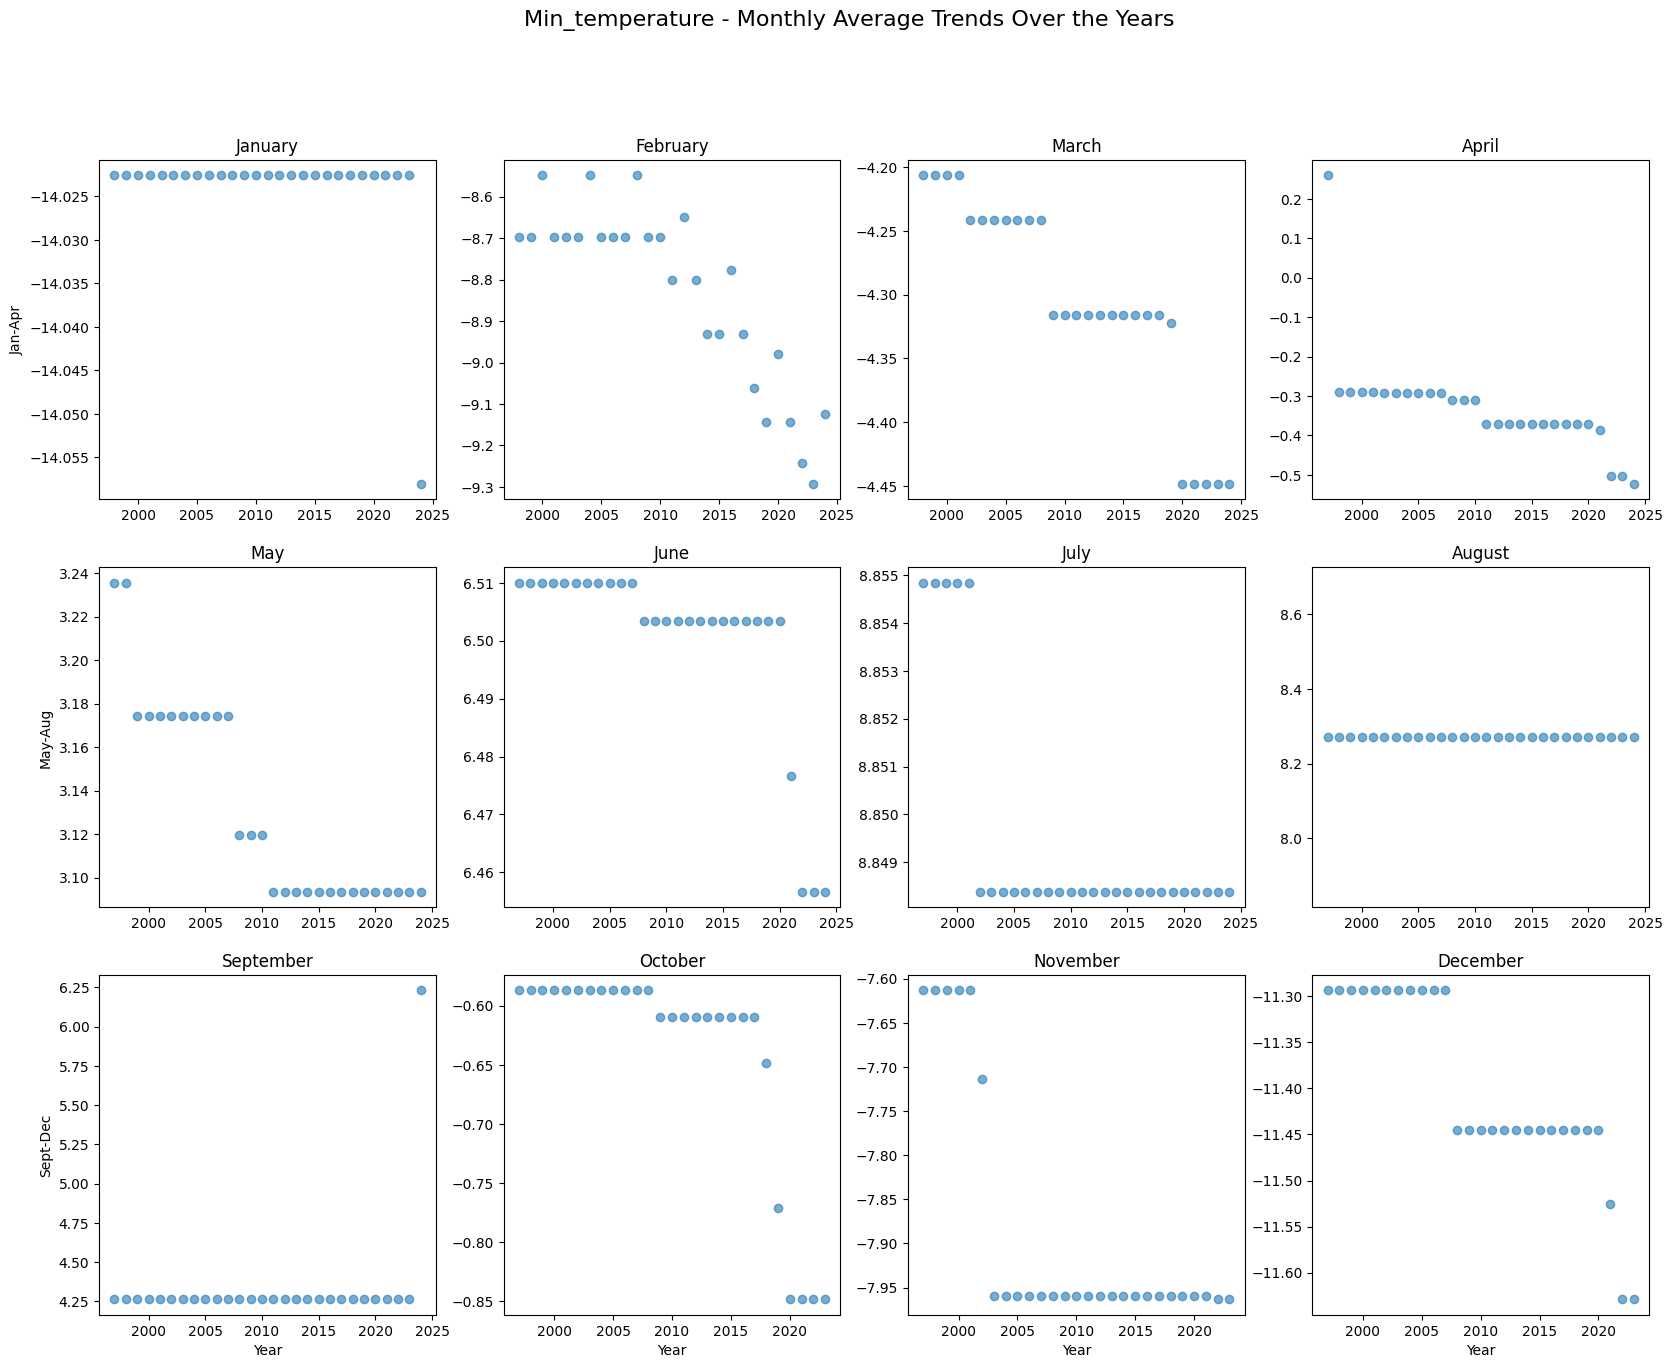

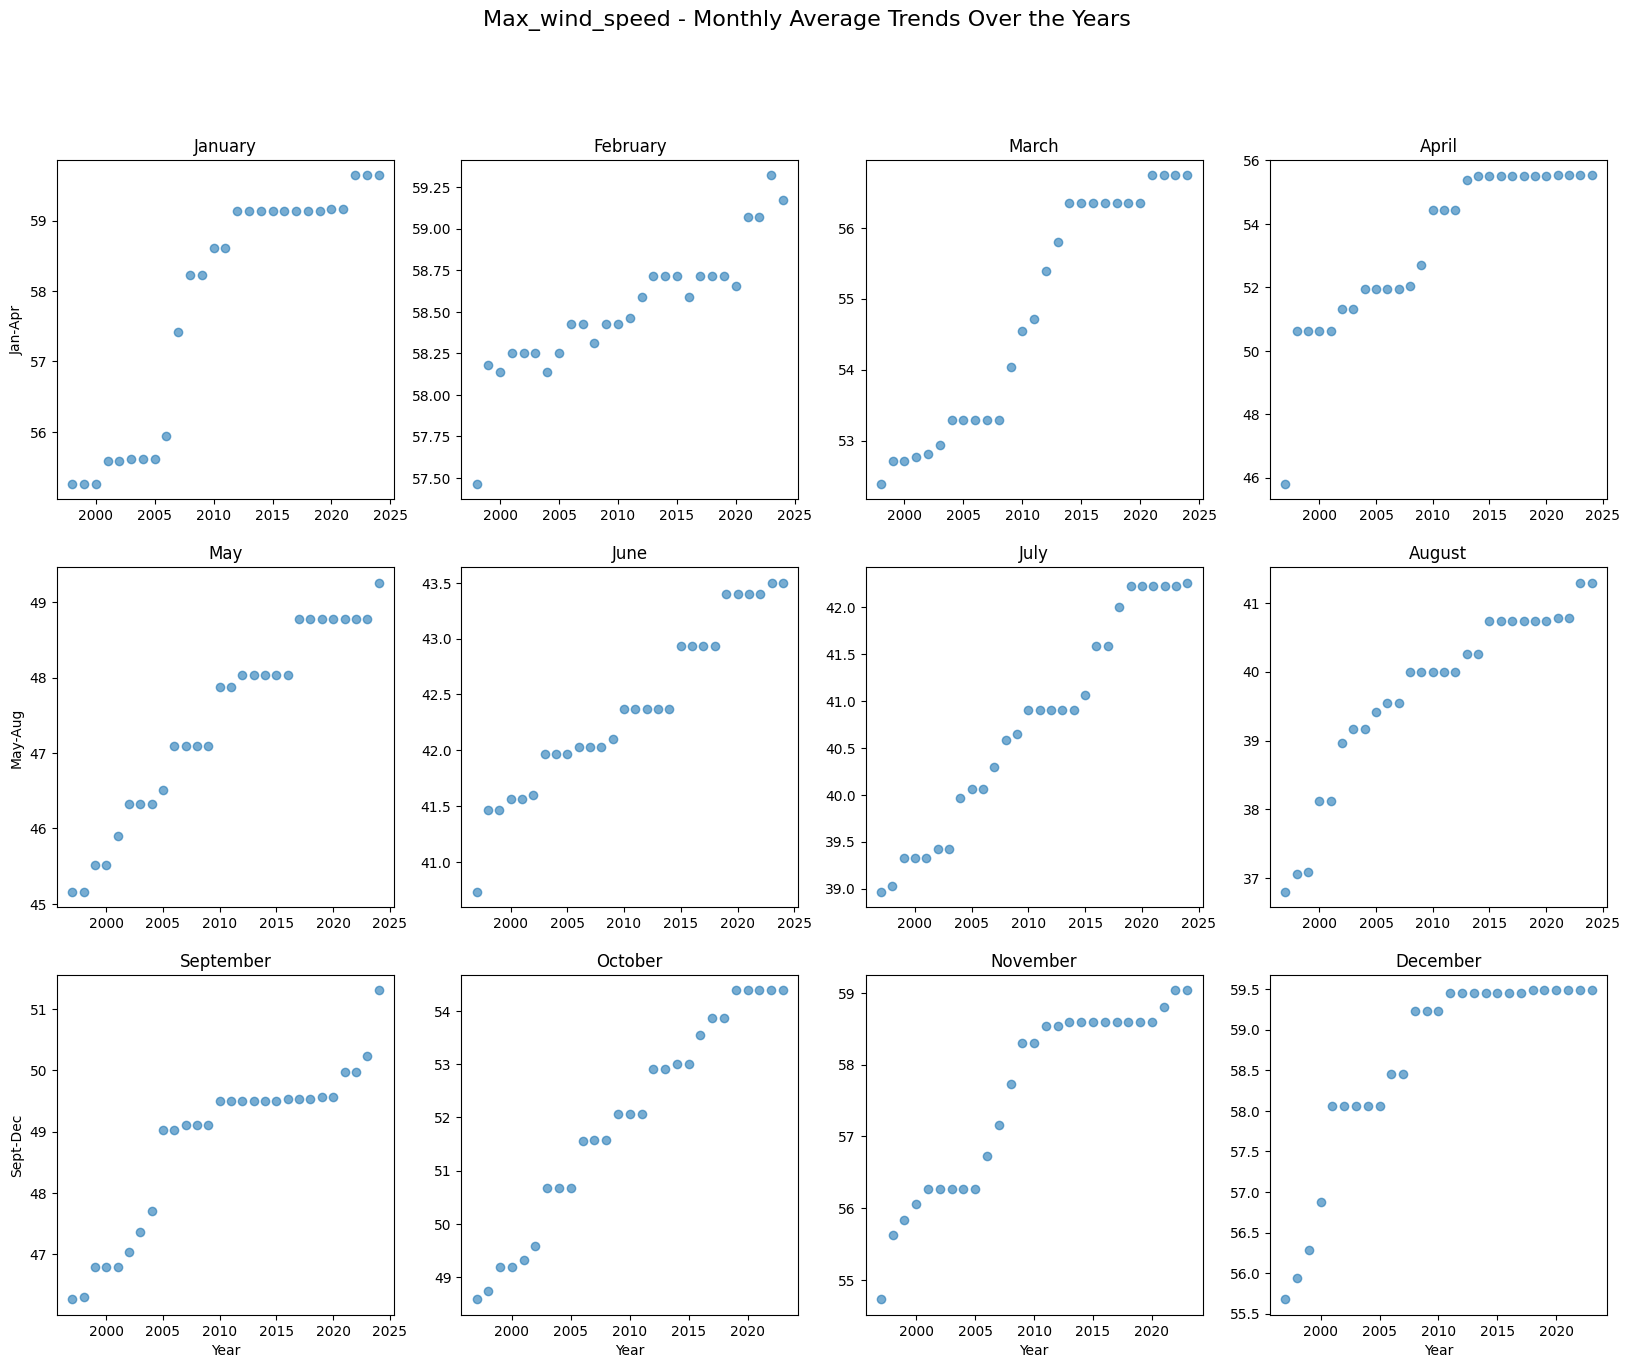

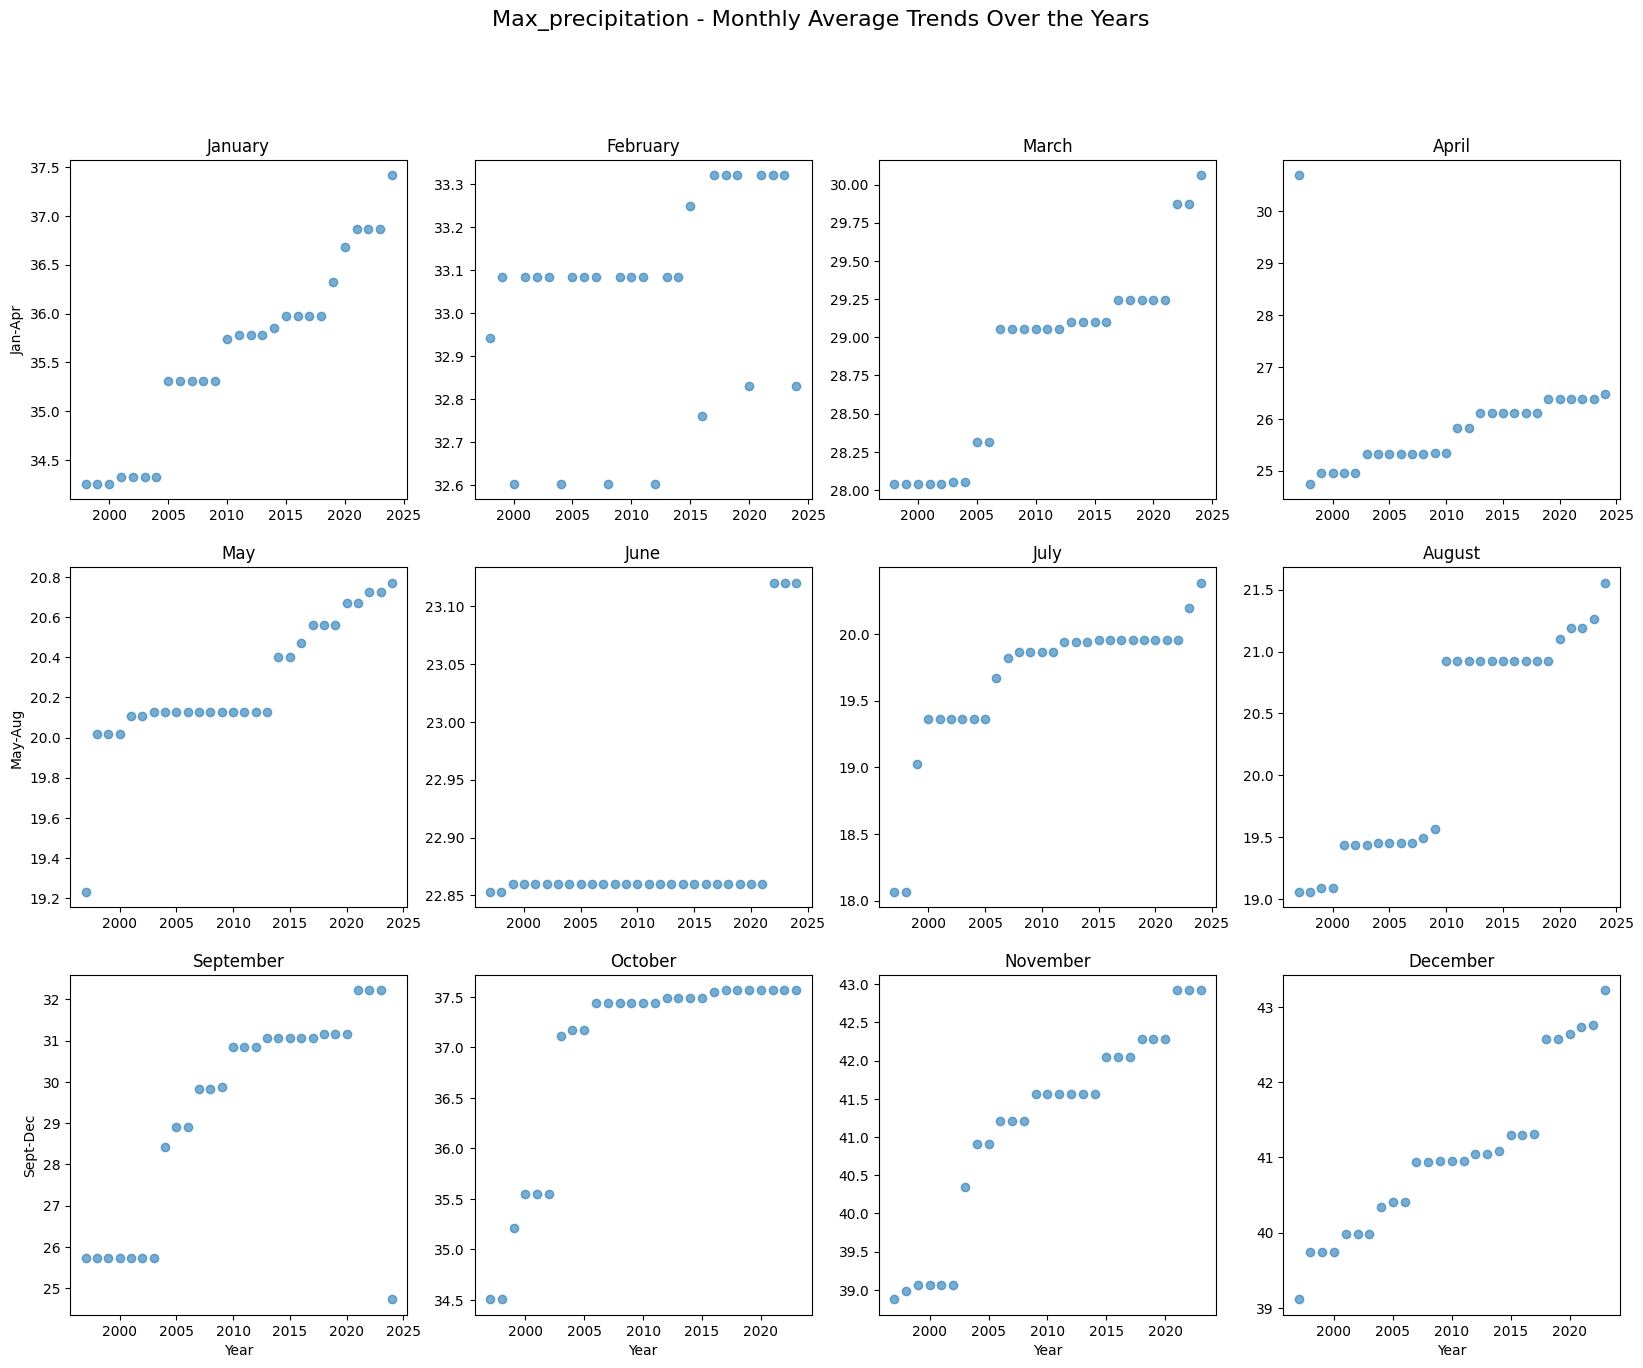

In [8]:
# Define start and end years
start_year, end_year = 1997, 2024

# Create a DataFrame to store all yearly outliers
all_yearly_outliers = pd.DataFrame()

# Extract year and month from the date
cm_data["year"] = cm_data["date"].dt.year
cm_data["month"] = cm_data["date"].dt.month

# Filter the data within the given date range
filtered_data = cm_data[(cm_data["year"] >= start_year) & (cm_data["year"] <= end_year)]

# Find outliers using linear regression for all variable pairs across years
for year, yearly_data in filtered_data.groupby("year"):
    for var1, var2 in [(x, y) for x in variables for y in variables if x != y]:
        if len(yearly_data[var2]) > 1:
            # Calculate linear regression
            slope, intercept = np.polyfit(yearly_data[var2], yearly_data[var1], 1)
            regression_line = intercept + slope * yearly_data[var2]

            # Calculate largest error (outlier)
            errors = np.abs(yearly_data[var1] - regression_line)
            largest_error_idx = errors.idxmax()
            largest_error_point = yearly_data.loc[largest_error_idx]

            # Add to the outliers DataFrame
            all_yearly_outliers = pd.concat([all_yearly_outliers, pd.DataFrame([largest_error_point])])

# Drop duplicate outliers and sort by date
sorted_all_outliers = all_yearly_outliers.drop_duplicates(subset="date").sort_values(by="date")

# Calculate monthly averages of the weather variables
monthly_avg = cm_data.groupby(["year", "month"])[variables].mean().reset_index()

# Plot monthly average trends for each variable
for variable in variables:
    fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=False)
    fig.suptitle(f"{variable.capitalize()} - Monthly Average Trends Over the Years", fontsize=16)

    for row, (start_month, end_month) in enumerate(month_groups):
        for month in range(start_month, end_month + 1):
            ax = axes[row, month - start_month]
            monthly_data = monthly_avg[monthly_avg["month"] == month]
            
            ax.scatter(monthly_data["year"], monthly_data[variable], alpha=0.6)
            ax.set_title(f"{months[month - 1]}")

            if row == 2:
                ax.set_xlabel("Year")
            if month == start_month:
                ax.set_ylabel(month_labels[row])

    plt.show()

### Interpretation of Anomaly Trends in Climate Variables

- Increasing Frequency and Magnitude of Anomalies:

    Across all variables (temperature, wind speed, and precipitation), the frequency and severity of anomalies appear to increase over the years. This indicates a growing number of months with extreme values, highlighting the intensification of unusual weather patterns.

    - For maximum temperature, nearly every month shows a marked increase in extreme high temperatures, especially in recent years. The rise in anomalies is indicative of increasingly hotter periods, suggesting a warming trend that aligns with global climate change concerns.

    - For minimum temperatures, while some months have stable anomalies, others—such as February, March, and April—show increasingly severe low temperatures. This mixed trend could reflect unpredictable shifts, possibly related to changes in seasonal behavior or intensified cold spells amidst general warming.

    - Maximum wind speed also shows an increasing anomaly trend, particularly evident in months such as January, March, and May. This suggests that wind-related extreme events—such as storms—are becoming more frequent or severe.
    
    - Maximum precipitation trends show a similar increase in anomaly frequency across several months. This points to more intense rainfall events, which could lead to an increased risk of floods or other water-related impacts.

The scatter plots provide clear evidence that climate anomalies are intensifying as time progresses. This intensification suggests that extreme weather conditions are becoming more common and severe, which aligns with predictions made by climate scientists regarding the effects of global climate change. Addressing these trends requires a robust focus on climate resilience and mitigation strategies to manage the growing risk of extreme weather events.

### Histogram of Frequency of Extreme Weathers by Year

What about the _frequency_ of extreme weather events? We aim to understand if the frequency of these events is also increasing. To do this, we created a histogram that visualizes the total number of anomalies for each year.


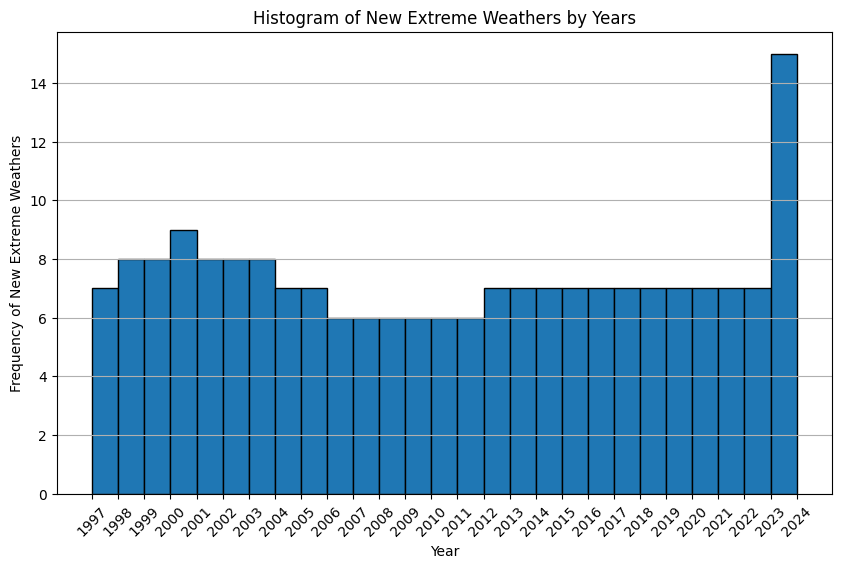

In [9]:
# Create a histogram to visualize the frequency of extreme weather events by year

# Extract the year from the 'date' column in the outliers DataFrame
sorted_all_outliers["year"]=sorted_all_outliers["date"].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sorted_all_outliers["year"], bins=range(sorted_all_outliers["year"].min(), sorted_all_outliers["year"].max() + 1), edgecolor="black")
plt.title("Histogram of New Extreme Weathers by Years")
plt.xlabel("Year")
plt.ylabel("Frequency of New Extreme Weathers")
plt.xticks(sorted_all_outliers["year"].unique(), rotation=45)
plt.grid(axis="y", linestyle="-")
plt.show()

### Interpretation of the Histogram

- 1997 - 2005: During this period, the frequency of extreme weather events remained moderately high, fluctuating between approximately 7 to 9 events per year. This indicates that the late 1990s to early 2000s experienced a relatively consistent and notable number of extreme weather incidents.

- 2006 - 2022: The frequency of extreme weather events dropped and remained stable during this period, averaging around 6 to 7 events per year. This suggests a period of relative calm compared to the preceding years. The stability indicates fewer significant anomalies in weather patterns over more than a decade.

- 2023: There is a sharp increase in 2023, with the frequency of extreme weather events reaching about 15 events, which is significantly higher than in any previous year. This suggests that 2023 experienced an unusually high number of extreme weather events, highlighting a potential escalation in weather volatility.

Interestingly, the frequency of anomalies does not follow a linear growth pattern. There have been fluctuations, with a relatively stable period in the mid-2000s, followed by an alarming increase in recent years, culminating in a signficiant spike in 2023.
This pattern highlight the growing impact of climate change and the importance of understanding, preparing for, and mitigating extreme weather events to minimize their societal and environmental impact.

# Part 3: Building a prediction model 

Since rising temperatures are key indicators of climate change and extreme weather events, we aim to predict the trends of maximum temperatures and understand how they will evolve in the future. We selected a linear regression model because it is well-suited for predicting continuous variables like temperature and is also effective for multivariate analysis. The model is trained using all relevant variables in this study, including minimum temperatures, maximum precipitation, and maximum wind speed.


In [10]:
# Define features and target variable
features = ["min_temperature", "max_wind_speed", "max_precipitation"]
target = "max_temperature"

# Prepare the data
X = cm_data[features]
y = cm_data[target]

# Split data into training and test sets
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create a DataFrame for the coefficients
coefficients = pd.DataFrame({
    "Feature": ["Intercept"] + features,
    "Coefficient": [model.intercept_] + list(model.coef_)})

# Calculate evaluation metrics
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
r2_score = model.score(X_test, y_test)
print(f"Cross-Validation RMSE: {round(cv_rmse,4)}")
print(f"R² Score: {round(r2_score,4)}")

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
ols_summary = pd.DataFrame({
    "Feature": ["Intercept"] + features,
    "Standard Error": ols_model.bse,
    "P-Value": ols_model.pvalues})

print("Coefficients:")
print(coefficients)
print("OLS Summary:")
print(ols_summary)

Cross-Validation RMSE: 2.1254
R² Score: 0.8735
Coefficients:
             Feature  Coefficient
0          Intercept    25.612216
1    min_temperature     0.676927
2     max_wind_speed    -0.069098
3  max_precipitation    -0.017896
OLS Summary:
                             Feature  Standard Error        P-Value
const                      Intercept        0.145226   0.000000e+00
min_temperature      min_temperature        0.004014   0.000000e+00
max_wind_speed        max_wind_speed        0.002691  7.823701e-140
max_precipitation  max_precipitation        0.002110   2.574671e-17


### Interpretation of the Linear Regression Model

Coefficients: 
  - The coefficient for minimum temperature (0.677) indicates a relatively strong positive relationship with the maximum temperature. This means that, on average, as the minimum temperature increases by one degree celsius, the maximum temperature is expected to increase by approximately 0.677 degree celsius, holding other factors constant.
  - The coefficients for maximum wind speed (-0.069) and precipitation (-0.018) are negative, which suggests a weak negative relationship with maximum temperature. This implies that higher wind speed and more precipitation are associated with slightly lower maximum temperatures.

 Standard Errors: 
  - The standard errors for all variables, including the intercept, are relatively small. This indicates that the estimates of the coefficients are reliable and the variability in the coefficient estimates is low.

P-Values: 
  - All of the p-values are well below the conventional 5% significance level. This means that we can reject the null hypothesis for each variable, concluding that each independent variable (minimum temperature, maximum wind speed, and precipitation) has a statistically significant relationship with maximum temperature. Specifically, each p-value is effectively zero, indicating very strong evidence of an effect.

R² Score:
  - The R² score of 0.8735 suggests that the model explains about 87.35% of the variance in the maximum temperature. This means the model has a strong fit, and the independent variables collectively provide a good explanation for the variation in maximum temperature. There is, however, still about 12.65% of the variability that remains unexplained by the current model, which could be due to other unmeasured factors.

Overall, the model appears to have a good fit, with minimum temperature having the strongest and most statistically significant effect on maximum temperature, while maximum wind speed and precipitation also contribute significantly but to a lesser extent. The relatively small standard errors and low p-values for all the coefficients indicate high confidence in these findings.

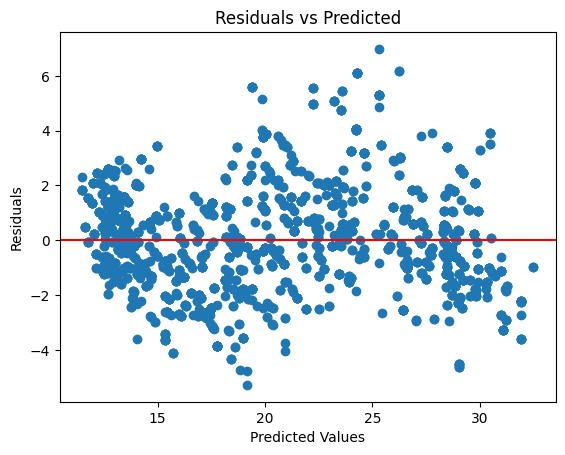

In [16]:
# Residual plot

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

### Intrepretation of the residual graph

The residuals show a "U" shape pattern, suggesting that the variance of the residuals changes across different predicted values. This indicates heteroskedasticity, which means that the error variance is not constant. It implies that the model might not be capturing all the relationships in the data accurately, especially for lower and higher predicted values.

The parabolic shape often suggests that the model does not adequately capture non-linearity in the data. In such cases, a higher-degree polynomial might be better suited to capture the underlying relationship.

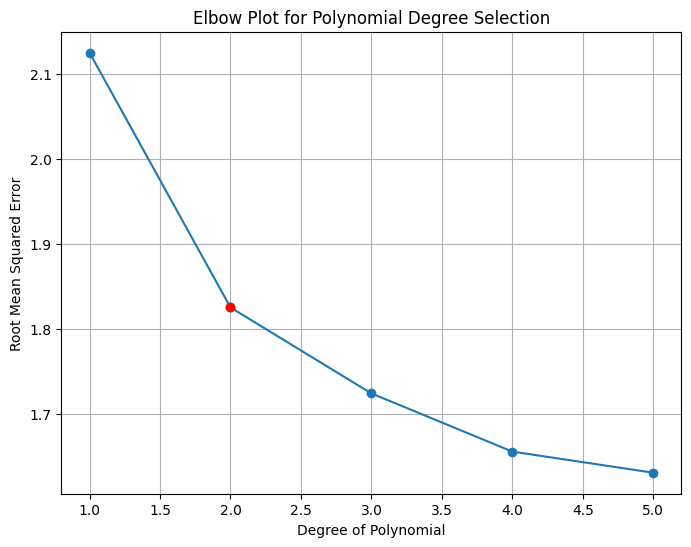

In [12]:
# Plot a Elbow Graph to find the optimal degree of polynomial regression

degrees = list(range(1, 6))
rmse_values = []

# Loop through polynomial degrees
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    
    # Perform cross-validation with RMSE
    model = LinearRegression()
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    rmse_values.append(rmse)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(degrees, rmse_values, marker='o')
plt.plot(2, rmse_values[1], 'ro')
plt.xlabel("Degree of Polynomial")
plt.ylabel("Root Mean Squared Error")
plt.title("Elbow Plot for Polynomial Degree Selection")
plt.grid()
plt.show()

### Interpretation of the Elbow Graph

Although higher-degree polynomials have lower RMSE values, it is crucial to be wary of overfitting. A lower RMSE does not always imply a better model, as higher-degree polynomials may fit the noise in the training data, resulting in poor generalization to unseen data. The choice of polynomial degree should balance error reduction and model simplicity to avoid overfitting.

In an ideal elbow plot, the elbow point is observed where further increases in the degree of the polynomial do not result in significant reductions in error. This suggests that degree 2 is a point of interest.


In [13]:
# Plot a polynomial regression

# Create quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_quad = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(features)

# Split data into training and test sets
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create a DataFrame for the coefficients
coefficients = pd.DataFrame({
    "Feature": ["Intercept"] + list(feature_names),
    "Coefficient": [model.intercept_] + list(model.coef_)})

# Calculate evaluation metrics
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
r2_score = model.score(X_test, y_test)
print(f"Cross-Validated RMSE: {round(cv_rmse,4)}")
print(f"R² Score: {round(r2_score,4)}")

# OLS Summary
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
ols_summary = pd.DataFrame({
    "Feature": ["Intercept"] + list(feature_names),
    "Standard Error": ols_model.bse,
    "P-Value": ols_model.pvalues})

print("Coefficients:")
print(coefficients)
print("OLS Summary:")
print(ols_summary)


Cross-Validated RMSE: 1.8251
R² Score: 0.9083
Coefficients:
                             Feature  Coefficient
0                          Intercept    21.866017
1                    min_temperature     0.737373
2                     max_wind_speed    -0.005215
3                  max_precipitation    -0.042683
4                  min_temperature^2     0.022091
5     min_temperature max_wind_speed     0.001665
6  min_temperature max_precipitation     0.000371
7                   max_wind_speed^2    -0.000217
8   max_wind_speed max_precipitation     0.000296
9                max_precipitation^2     0.000242
OLS Summary:
                                 Feature  Standard Error        P-Value
const                          Intercept        0.568322  2.848368e-297
x1                       min_temperature        0.023279  1.565882e-207
x2                        max_wind_speed        0.018367   7.764790e-01
x3                     max_precipitation        0.012977   1.009249e-03
x4               

### Interpretation of Polynomial Model

Cross-Validation RMSE:
- The new model has a lower RMSE compared to the previous model, indicating better predictive accuracy on average. This suggests that it fits the data more effectively, resulting in lower prediction errors.

R² Score:
- The new model has a higher R² score, indicating a better fit to the training data compared to the previous model.

Coefficients & P-values:
- Minimum Temperature:
  - The new model shows a higher coefficient for minimum temperature, indicating a slightly stronger impact compared to the previous model.
  - The p-value is close to zero, suggesting that minimum temperature is highly significant.

- Maximum Wind Speed:
  - The new model shows a more negative coefficient for maximum wind speed, indicating a stronger negative impact on the target variable.
  - The higher p-value in the new model suggests that maximum wind speed may be less reliable for predicting maximum temperature.

- Maximum Precipitation:
  - The new model indicates a stronger negative effect of maximum precipitation on maximum temperature.
  - Maximum precipitation remains statistically significant, with a very small p-value.

The polynomial regression model appears to provide a better fit to the data, with a lower RMSE and a higher R² score.


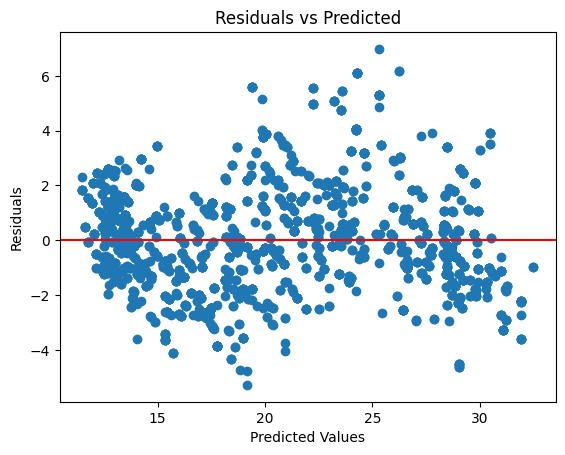

In [15]:
# Residual plot

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

### Interpretation of the new residual plot

The residual variance appears to be more consistent in the polynomial regressions model's residual plot compared to the previous one, where variability variability is larger at the extremes. A better spread of residuals indicating a more unbiased model without clear systematic errors. This implies that the polynomial regression model might be better suited to cpature the relationships in the data.


# Part 4: Discussion & Conclusion

Our analysis of Vancouver's historical and present weather data shows clear evidence of increasing intensity and frequency of extreme weather events each year. The trend of extreme weather events is undeniable, with yearly records being broken in intensity and an exponentially rapid growth in frequency.

It is evident that despite worldwide agreements such as the Paris Agreement coming into effect a decade ago (UNFCCC), the rising trend of extreme weather events in Vancouver has not halted but continues to grow rapidly. The analysis serves as a clear warning that urgent and effective action is critically needed to combat climate change.


# Reference
WeatherStats. (n.d.). Vancouver historical weather data. https://vancouver.weatherstats.ca/download.html

CBC News (2024, Nov 20). Tens of thousands without power, ferries cancelled after 'bomb cyclone' batters B.C. coast. https://www.cbc.ca/news/canada/british-columbia/bomb-cyclone-bc-nov-20-1.7388144

Coumou, D., & Rahmstorf, S. (2012). A decade of weather extremes. *Nature climate change, 2*(7), 491-496.

National Academies of Sciences, Division on Earth, Life Studies, Board on Atmospheric Sciences, Committee on Extreme Weather Events, & Climate Change Attribution. (2016). *Attribution of extreme weather events in the context of climate change.* National Academies Press.

United Nations Climate Change. What is the Paris Agreement? https://unfccc.int/process-and-meetings/the-paris-agreement#:~:text=The%20Paris%20Agreement%20is%20a,force%20on%204%20November%202016.

